In [32]:
%run -m ipy_startup
%matplotlib inline
import os

In [88]:
def load_table(table, data_dir='/Users/eczech/data/research/wmi'):
    print('Loading table "{}"'.format(table))
    header_path = os.path.join(data_dir, '{}_Headers.csv'.format(table))
    data_path = os.path.join(data_dir, '{}.csv'.format(table))
    
    if os.path.getsize(data_path) == 0:
        print('Skipping table "{}" due to empty data file ({})'.format(table, data_path))
        return None
    assert os.path.getsize(header_path) > 0, 'Header file cannot be empty (table = {})'.format(table)
    
    cols = pd.read_csv(header_path, header=None, names=['col'])
    return pd.read_csv(data_path, names=cols['col'], sep='\|:\|', engine='python')

def load_all_tables(data_dir='/Users/eczech/data/research/wmi', skip_tables=['ProjectBrochures']):
    tables = []
    for file in os.listdir(data_dir):
        tables.append(file.split('_')[0].split('.')[0])
    
    data = {}
    for table in np.unique(tables):
        if table in skip_tables:
            continue
        d = load_table(table, data_dir)
        if d is not None:
            data[table] = d
    return data

def search_for_column(db, column):
    tables = []
    for table, data in db.items():
        if column in data:
            tables.append(table)
    return tables

In [86]:
db = load_all_tables()

Loading table "Alerts"
Loading table "Approvals"
Loading table "AssessmentSummaryInformation"
Loading table "AssessmentUpdateLog"
Loading table "BudgetAndResources"
Loading table "BudgetGroup"
Loading table "BudgetIdentifier"
Loading table "BudgetScheduleOfValuesAndProject"
Loading table "Budgets"
Loading table "Communications"
Loading table "Contacts"
Loading table "ContactsAndProjects"
Loading table "Countries"
Loading table "DistributionPoints"
Loading table "EmailReports"
Loading table "ErrorLog"
Loading table "ExternalDataMonitoring"
Skipping table "ExternalDataMonitoring" due to empty data file (/Users/eczech/data/research/wmi/ExternalDataMonitoring.csv)
Loading table "FollowUps"
Loading table "Forecasting"
Loading table "ForecastingUpdateLog"
Loading table "FundedAssessments"
Loading table "FundingSources"
Loading table "GS828DataLoggersAndAssessments"
Loading table "GroupOfAssessments"
Loading table "Groups"
Loading table "GroupsAndUsers"
Skipping table "GroupsAndUsers" due to 

In [90]:
search_for_column(db, 'AssessmentID')

['ManagementCapacityIndex',
 'ContactsAndProjects',
 'RelationalAwarenessIndex',
 'LifeLinkTransactions',
 'ReportSummaryEmail',
 'ReportsCommunityManaged',
 'GroupOfAssessments',
 'NetSuiteTasks',
 'NewReports',
 'ErrorLog',
 'AssessmentSummaryInformation',
 'PhotosAndProjects',
 'PartnersAndAssessments',
 'MediaLinks',
 'FundedAssessments',
 'FundingSources',
 'Approvals',
 'Tags',
 'Testimonials',
 'ScheduledReports',
 'SafeWaterProjectMonthlySummary',
 'AssessmentUpdateLog',
 'LifeLinkTransactionsTest',
 'Communications',
 'WaterQualityTests',
 'FollowUps',
 'DistributionPoints',
 'GS828DataLoggersAndAssessments',
 'ProjectsInformation',
 'MobileAppUserProjects',
 'BudgetScheduleOfValuesAndProject',
 'LifeLinkUnits',
 'Notifications',
 'InvolvedPersons',
 'Reports',
 'Reflections']

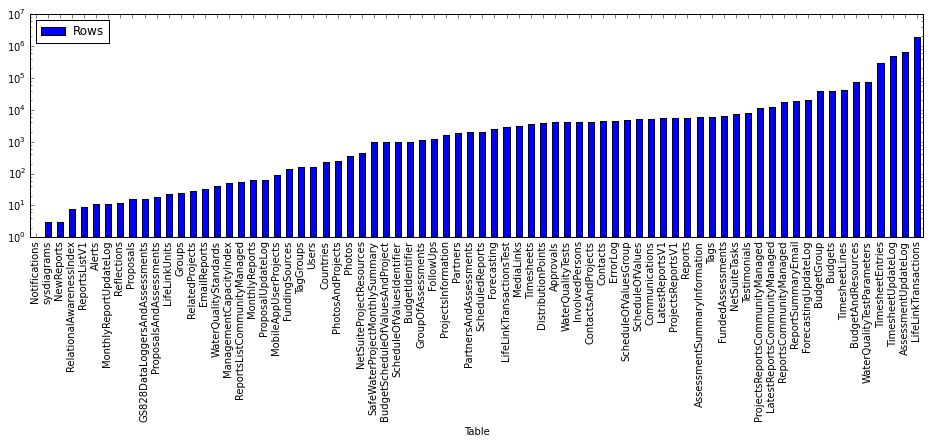

In [99]:
ax = pd.DataFrame([(k, len(v)) for k, v in db.items()], columns=['Table', 'Rows'])\
    .sort_values('Rows').set_index('Table').plot(kind='bar', figsize=(16,4))
ax.set_yscale('log')

In [104]:
db['BudgetAndResources'].head()

,BudgetAndResourcesID,BudgetID,Phase,ProjectResourceNetSuiteInternalID,Hours,UnitWorkPercentage
0,221,288,1. Assessment,48101,0,100
1,222,288,2. Design,48101,0,100
2,223,288,3. Construction and installation,48101,0,100
3,224,288,4. Community Development,48101,0,100
4,225,288,5. Follow-up and support,48101,0,100


In [106]:
db['AssessmentSummaryInformation'].iloc[0]

AssessmentID                                            1
AssessmentName                      Bondeni water Project
GPSLatitude                                      .9952700
GPSLongitude                                   34.8893333
Population                                           7000
AnticipatedPeopleServed                              3000
Budget                                         19000.0000
FundingNotes                                H4O - $19,000
AssessmentNotes                                       NaN
Feasible                                              Yes
ProjectManager                                    mngania
Country                                             Kenya
Priority                                           Normal
AssessmentCompletedOn                          2008-03-16
FindFunding                                           NaN
NotifyOnUpdateEmails              kherr@watermissions.org
Region                                                NaN
ProjectClassif

In [110]:
sorted(list(db.keys()))

['Alerts',
 'Approvals',
 'AssessmentSummaryInformation',
 'AssessmentUpdateLog',
 'BudgetAndResources',
 'BudgetGroup',
 'BudgetIdentifier',
 'BudgetScheduleOfValuesAndProject',
 'Budgets',
 'Communications',
 'Contacts',
 'ContactsAndProjects',
 'Countries',
 'DistributionPoints',
 'EmailReports',
 'ErrorLog',
 'FollowUps',
 'Forecasting',
 'ForecastingUpdateLog',
 'FundedAssessments',
 'FundingSources',
 'GS828DataLoggersAndAssessments',
 'GroupOfAssessments',
 'Groups',
 'InvolvedPersons',
 'LatestReportsCommunityManaged',
 'LatestReportsV1',
 'LifeLinkTransactions',
 'LifeLinkTransactionsTest',
 'LifeLinkUnits',
 'ManagementCapacityIndex',
 'MediaLinks',
 'MobileAppUserProjects',
 'MonthlyReportUpdateLog',
 'MonthlyReports',
 'NetSuiteProjectResources',
 'NetSuiteTasks',
 'NewReports',
 'Notifications',
 'Partners',
 'PartnersAndAssessments',
 'Photos',
 'PhotosAndProjects',
 'ProjectsInformation',
 'ProjectsReportsCommunityManaged',
 'ProjectsReportsV1',
 'ProposalUpdateLog',
 'P

In [131]:
db['PartnersAndAssessments'].head()

,AssessmentID,PartnerID,PartnerType,PartnersAndAssessmentsID
0,116,18,NaN,1053
1,2,20,NaN,1054
2,3,21,NaN,1055
3,4,23,NaN,1056
4,14,25,NaN,1057


In [121]:
db['ProjectsInformation'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 0 to 1630
Data columns (total 54 columns):
AssessmentID                                           1621 non-null object
AverageHouseholdIncome                                 682 non-null float64
AverageHouseholdIncomeUnits                            743 non-null object
AnticipatedMonthlyOperationalCost                      463 non-null float64
AnticipatedMonthlyReplacementCost                      463 non-null float64
AnticipatedHouseholdPenetration                        458 non-null float64
AnticipatedIndividualConsumption                       455 non-null float64
AnticipatedExchangeRate                                463 non-null float64
AnticipatedDailyProduction                             470 non-null object
MaxAllowableWaterPrice                                 455 non-null float64
TargetMonthlyOperationalCosts                          173 non-null object
TargetMonthlySavings                                   170 n

# Individual Dataset Loading Routines

In [58]:
def assessment_summary_information():
    d = load_table('AssessmentSummaryInformation')
    d['AssessmentID'] = pd.to_numeric(d['AssessmentID'], errors='corece')
    return d[d['AssessmentID'].notnull()]
d = assessment_summary_information()
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116 entries, 0 to 5737
Data columns (total 23 columns):
AssessmentID                      4116 non-null float64
AssessmentName                    4084 non-null object
GPSLatitude                       3136 non-null object
GPSLongitude                      3135 non-null object
Population                        2182 non-null object
AnticipatedPeopleServed           2203 non-null object
Budget                            1244 non-null object
FundingNotes                      2447 non-null object
AssessmentNotes                   1751 non-null object
Feasible                          1924 non-null object
ProjectManager                    3586 non-null object
Country                           3505 non-null object
Priority                          3590 non-null object
AssessmentCompletedOn             1448 non-null object
FindFunding                       299 non-null object
NotifyOnUpdateEmails              50 non-null object
Region         

In [54]:
def

,AssessmentID,AssessmentName,GPSLatitude,GPSLongitude,Population,AnticipatedPeopleServed,Budget,FundingNotes,AssessmentNotes,Feasible,...,FindFunding,NotifyOnUpdateEmails,Region,ProjectClassification,DevelopmentRelationshipManager,ProjectSubclassification,ProjectType,NetSuiteCPInternalID,NetSuiteUSInternalID,AssessmentID2
0,1,Bondeni water Project,.9952700,34.8893333,7000,3000,19000.0000,"H4O - $19,000",NaN,Yes,...,NaN,kherr@watermissions.org,NaN,N/A - Old project,NaN,NaN,NaN,1654,3266,1
1,2,Chesowos Adventist Secondary School,.9700000,34.8500000,3100,3100,NaN, ,NaN,Yes,...,NaN,NaN,NaN,N/A - Old project,NaN,NaN,NaN,1655,3267,2
2,3,Plateau Girls School and Community,NaN,NaN,300,NaN,25000.0000, ,NaN,No,...,NaN,NaN,NaN,N/A - Old project,NaN,NaN,NaN,NaN,NaN,3
3,4,Kapcherop Boys Secondary School,NaN,NaN,3200,3200,22500.0000,"H4O - $10,000",A follow up visit was made with the intention ...,No,...,NaN,kherr@watermissions.org,NaN,N/A - Old project,NaN,NaN,NaN,1656,3268,4
4,14,Elshaddai Children�s Home; Church & School,NaN,NaN,1500,1500,NaN,NaN,This project does not exist. No documentation ...,No,...,NaN,NaN,NaN,N/A - Old project,NaN,NaN,NaN,NaN,NaN,14


In [52]:
d1[d1['AssessmentID2'].isnull()]

,AssessmentID,AssessmentName,GPSLatitude,GPSLongitude,Population,AnticipatedPeopleServed,Budget,FundingNotes,AssessmentNotes,Feasible,...,FindFunding,NotifyOnUpdateEmails,Region,ProjectClassification,DevelopmentRelationshipManager,ProjectSubclassification,ProjectType,NetSuiteCPInternalID,NetSuiteUSInternalID,AssessmentID2
16,Very Old assessment,No,mjosue,Sri Lanka,Normal,2008-03-27,NaN,NaN,NaN,N/A - Old project,...,NaN,None,None,None,None,None,None,NaN,NaN,NaN
65,NaN,Yes,djan,Indonesia,Normal,2007-08-02,NaN,NaN,NaN,N/A - Old project,...,NaN,None,None,None,None,None,None,NaN,NaN,NaN
88,Old project that would need new assesment to p...,No,mjosue,Sri Lanka,Normal,2008-05-28,NaN,NaN,NaN,N/A - Old project,...,NaN,None,None,None,None,None,None,NaN,NaN,NaN
115,The system has moved to Simpang Selayang,Yes,djan,Indonesia,Normal,2007-12-20,NaN,NaN,NaN,N/A - Old project,...,3136,None,None,None,None,None,None,NaN,NaN,NaN
119,The NGO that request us to enter this area had...,No,djan,Indonesia,Normal,2008-03-11,NaN,NaN,NaN,N/A - Old project,...,NaN,None,None,None,None,None,None,NaN,NaN,NaN
132,Retrofit completed 2/2/09,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
133,Municipality: LA CEIBA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
134,Dept name: ATLANTIDA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
135,"Operator: Carlos Gonzales, Tel. 9884.2400",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
136,NaN,Yes,hchacon,Honduras,Normal,2000-01-01,NaN,NaN,NaN,N/A - Old project,...,3013,None,None,None,None,None,None,NaN,NaN,NaN


In [25]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5738 entries, 0 to 5737
Data columns (total 23 columns):
AssessmentID                      5621 non-null object
AssessmentName                    4591 non-null object
GPSLatitude                       3649 non-null object
GPSLongitude                      3660 non-null object
Population                        2707 non-null object
AnticipatedPeopleServed           2674 non-null object
Budget                            1472 non-null object
FundingNotes                      2465 non-null object
AssessmentNotes                   1753 non-null object
Feasible                          2449 non-null object
ProjectManager                    3600 non-null object
Country                           3516 non-null object
Priority                          3604 non-null object
AssessmentCompletedOn             1555 non-null object
FindFunding                       407 non-null object
NotifyOnUpdateEmails              62 non-null object
Region          

In [ ]:
d2 = 

In [33]:
d1.groupby('Country')['AnticipatedPeopleServed'].mean()

DataError: No numeric types to aggregate